In [4]:
import os
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Define the path to your image folders
image_folder_path = "/Users/sumaiyauddin/Documents/Semester03/CCNY-DSE-Capstone-Project-Segmenting-Coral-Branch-tips/data/external/Coral_images"

# Initialize lists to store images and labels
images = []
labels = []

# Iterate through each folder in the main directory
for folder_name in os.listdir(image_folder_path):
    folder_path = os.path.join(image_folder_path, folder_name)
    
    # Check if the item in the main directory is a folder
    if os.path.isdir(folder_path):
        # Iterate through each image file in the subfolder
        for image_filename in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_filename)
            
            # Load the image using OpenCV
            image = cv2.imread(image_path)
            
            # Check if the image was loaded successfully
            if image is not None:
                # Resize the image to 1080x1080 if needed
                if image.shape[0] >= 1080 and image.shape[1] >= 1080:
                    image = cv2.resize(image, (1080, 1080))
                else:
                    print(f"Image dimensions are too small for resizing: {image_path}")
                
                # Append the image to the list of images
                images.append(image)
                
                # Append the label (folder name) to the list of labels
                labels.append(folder_name)
            else:
                # Handle the case where the image couldn't be loaded
                print(f"Error loading image: {image_path}")

Error loading image: /Users/sumaiyauddin/Documents/Semester03/CCNY-DSE-Capstone-Project-Segmenting-Coral-Branch-tips/data/external/Coral_images/Pseudodiploria/.DS_Store


In [5]:
# Convert the lists to NumPy arrays for further analysis
images = np.array(images)
labels = np.array(labels)

# Now, check the shapes
print(f"Images shape: {images.shape}")
print(f"Labels shape: {labels.shape}")


Images shape: (907, 1080, 1080, 3)
Labels shape: (907,)


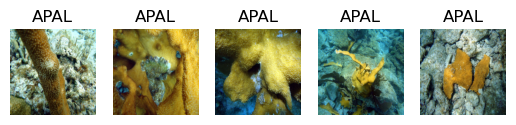

In [6]:
# Perform your initial EDA here, e.g., display some images
num_samples_to_display = 5
for i in range(num_samples_to_display):
    plt.subplot(1, num_samples_to_display, i + 1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(labels[i])
    plt.axis("off")

plt.show()

In [7]:
# Initialize a dictionary to store counts for each coral type
coral_counts = {}

# Iterate through each folder in the main directory
for folder_name in os.listdir(image_folder_path):
    folder_path = os.path.join(image_folder_path, folder_name)
    
    # Check if the item in the main directory is a folder
    if os.path.isdir(folder_path):
        # Count the number of images in the subfolder
        num_images = len(os.listdir(folder_path))
        
        # Store the count in the dictionary with the coral type as the key
        coral_counts[folder_name] = num_images

# Display the counts for each coral type
for coral_type, count in coral_counts.items():
    print(f"{coral_type}: {count} images")

APAL: 120 images
Pseudodiploria: 788 images


In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


In [9]:
# Check the shape of the training and testing sets
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (725, 1080, 1080, 3)
y_train shape: (725,)
X_test shape: (182, 1080, 1080, 3)
y_test shape: (182,)


Text(0, 0.5, 'Frequency')

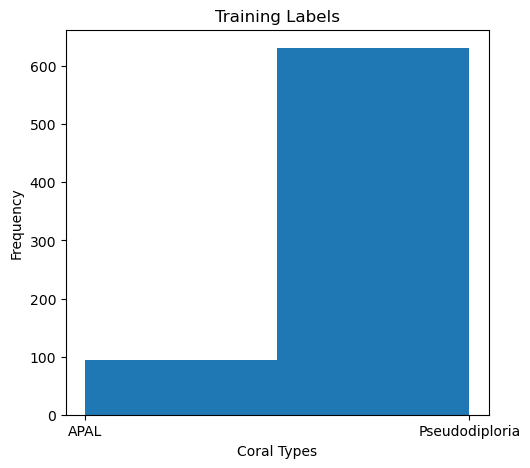

In [10]:
# Example: Display training labels
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(y_train, bins=len(np.unique(y_train)))
plt.title('Training Labels')
plt.xlabel('Coral Types')
plt.ylabel('Frequency')

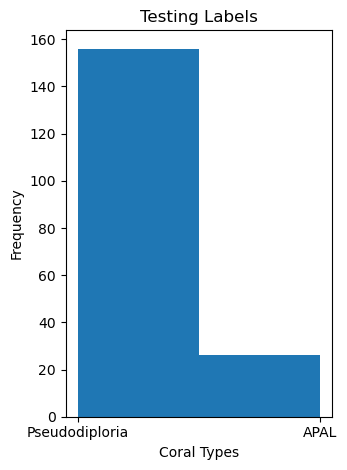

In [11]:
# Example: Display testing labels
plt.subplot(1, 2, 2)
plt.hist(y_test, bins=len(np.unique(y_test)))
plt.title('Testing Labels')
plt.xlabel('Coral Types')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

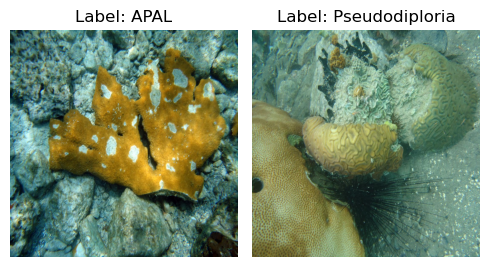

In [16]:
import matplotlib.pyplot as plt
import random

# Define the number of rows and columns for the grid
num_rows = 1
num_columns = 2

# Create a random selection of unique labels from your dataset
unique_labels = np.unique(labels)

# Ensure the number of selected labels is less than or equal to the number of unique labels
num_samples = min(num_rows * num_columns, len(unique_labels))
selected_labels = random.sample(list(unique_labels), num_samples)

# Create subplots for displaying the selected images and labels
fig, axes = plt.subplots(num_rows, num_columns, figsize=(5, 3))
axes = axes.ravel()

for i, label in enumerate(selected_labels):
    # Find the indices of all samples with the target class label
    class_indices = np.where(labels == label)[0]
    
    # Randomly select one index from the class indices
    selected_index = random.choice(class_indices)
    
    # Display the selected image and label
    axes[i].imshow(cv2.cvtColor(images[selected_index], cv2.COLOR_BGR2RGB))
    axes[i].set_title(f'Label: {label}')
    axes[i].axis("off")

plt.tight_layout()
plt.show()
